# Regressão Logística

## Dataset de Previsão e Detecção de Risco de Crédito

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [4]:
df.columns[1:]

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [5]:
len(df.columns[1:])

20

In [6]:
len(df)

1000

## Análise Exploratória

In [7]:
# variavél target ou classe - class
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


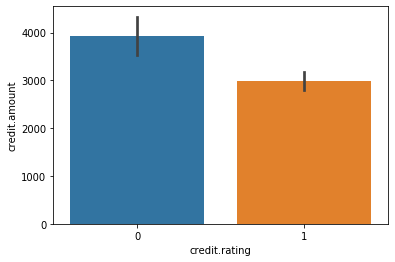

In [9]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

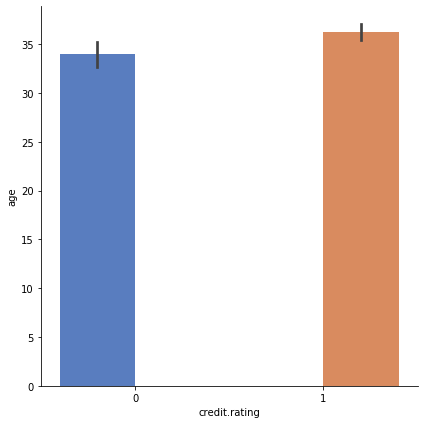

In [10]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

In [11]:
df.age.mean()

35.542

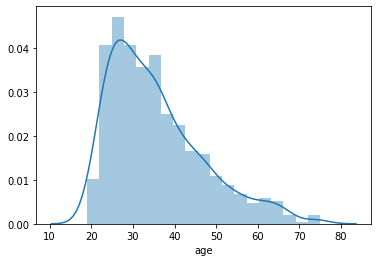

In [12]:
sns.distplot(df.age)

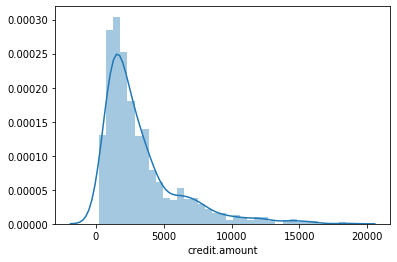

In [13]:
sns.distplot(df['credit.amount']) # quantidade de crédito

## Definindo X e Y

In [14]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [15]:
atributos = df.columns[1:]
atributos

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [ ]:
atributos2 = ['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker']

In [ ]:
X = df[ atributos2 ]

In [ ]:
X = df.iloc[:,1:].values.astype(float)
y = df.iloc[:,0]
#y = df.loc[:, ['apartment.type']]

In [ ]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [ ]:
X[:3]

In [ ]:
y[:3]

## Preparando os dados para aplicar Regressão Logistica<br />
## Colocando os dados em Escala

In [ ]:
X.shape

## Aplicando o Algoritmo

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)
model

## Avaliando A Acurácia do Modelo

In [ ]:
# check the accuracy on the training set
model.score(X, y)

### Examinando os Coeficientes

In [ ]:
cols = df.columns.values
cols

In [ ]:
cols_atributos = cols[1:]
cols_atributos

In [ ]:
len(cols_atributos)

In [ ]:
model.coef_[0]

In [ ]:
len(model.coef_[0])

In [ ]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

In [ ]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

## Avaliando o modelo usando split de dados

In [ ]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

In [ ]:
print(len(X_train), len(X_test))

In [ ]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

In [ ]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted))

In [ ]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

In [ ]:
print('Valores Previstos e suas Probalidades')
elementos = [[x,y] for x, y in zip(y_predicted,probs)]
elementos
df2 = pd.DataFrame(elementos, columns=['Classe', 'Probabilidade'])
df2.head(10)

## Avaliando o modelo usando Cross-validation

In [ ]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))
print(resultado)

## Realizando Previsões

In [ ]:
df.head()

In [ ]:
df.loc[0,:].values

In [ ]:
df['account.balance'].value_counts()

In [ ]:
df.savings.value_counts()

In [ ]:
df.columns[1:]

In [ ]:
Xprev1 = np.array(
    [      1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1] )

Xprev1

In [ ]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

In [ ]:
model.predict(Xprev1)

In [ ]:
model.predict_proba(Xprev1)

In [ ]:
df.loc[100,:].values

In [ ]:
Xprev2 = np.array([ 3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

In [ ]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

In [ ]:
model.predict(Xprev2)

In [ ]:
model.predict_proba(Xprev2)

In [ ]:
df.loc[5,:].values

In [ ]:
Xprev = np.array([1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

In [ ]:
Xprev = Xprev.reshape(1, -1)
Xprev

In [ ]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev)

In [ ]:
model.predict_proba(Xprev)

In [ ]:
df.loc[950,:].values

In [ ]:
Xprev3 = np.array([2,   24,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

In [ ]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

In [ ]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev3)

In [ ]:
model.predict_proba(Xprev3)

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

In [ ]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

df.head()

## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

## Curva ROC 
A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

In [ ]:
modelo = LogisticRegression()
modelo.fit(X,y)
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logarithmic Loss
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

In [ ]:
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

In [ ]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.3
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

In [ ]:
[[ 39  58]
 [ 16 187]]

In [ ]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

## Relatório de Classificação

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
Image("confusion_matrix.png", width=250, height=250)

$\text{Precision} = \frac{TP}{TP+FP}$  $ | \text{Recall} = \frac{TP}{TP+FN}$

In [ ]:
print(report);print('matriz de confusão:\n', matrix)